In [2]:
from PIL import Image, ImageDraw, ImageFont, ImageEnhance, ImageFilter
import requests # download data from url

In [3]:
# local image
local_image_path = r"C:\Users\ZAID\Pictures\reigen_sensei.png"
# image from an url
image_url = "https://images.datacamp.com/image/upload/v1657018082/Python_snake_c7d86ba58b.jpg"

In [4]:
im1 = Image.open(local_image_path)
print(im1)

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=2048x2048 at 0x1E88E998550>


In [5]:
def get_image_from_url(url):
    response = requests.get(url, stream = True)
    return Image.open(response.raw)

In [6]:
im2 = get_image_from_url(image_url)
print(im2)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x853 at 0x1E88E580110>


In [7]:
# image attributes
print("Image 1")
print("Mode", im1.mode)
print("Format", im1.format)
print("Size", im1.size)
print("Width", im1.width)
print("Height", im1.height)
print("Info",im1.info)

Image 1
Mode RGBA
Format PNG
Size (2048, 2048)
Width 2048
Height 2048
Info {'srgb': 0, 'gamma': 0.45455, 'dpi': (95.96119999999999, 95.96119999999999)}


In [8]:
print("Image metadata")
print(im1.getexif())

Image metadata
{}


METHODS

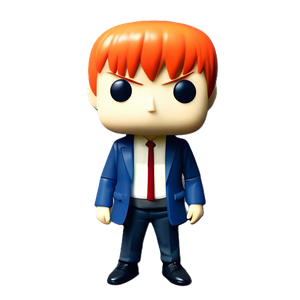

In [9]:
# resize image
im11 = im1.resize((300, 300), resample=Image.LANCZOS)
im11

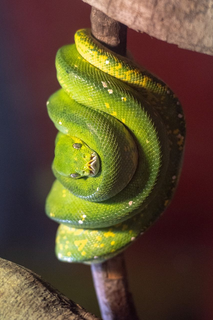

In [10]:
w, h = im2.size
im22 = im2.resize((w//4, h//4), resample=Image.LANCZOS)
# rotate image
im22.rotate(90, expand=True)

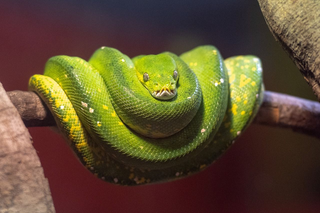

In [11]:
# flip image
im22.transpose(Image.FLIP_LEFT_RIGHT)

(300, 300)


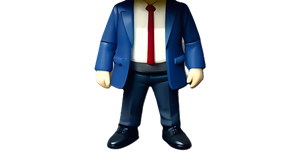

In [12]:
# crop image
print(im11.size)
im11.crop((0,136,im11.width, im11.height))

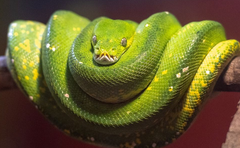

In [13]:
im22.crop((50,35, im22.width-30, im22.height-30))

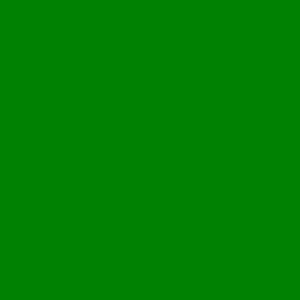

In [14]:
# creating a blank image
gimg = Image.new("RGBA", (300, 300), "green")
gimg

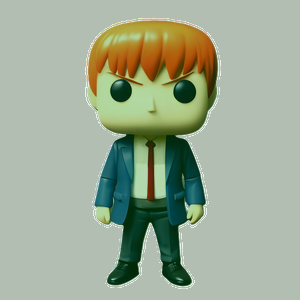

In [15]:
# blending images - Rule: same size and same mode
im11 = im11.convert(gimg.mode) # convert to same mode
im11 = im11.resize(gimg.size) # resize to same size
Image.blend(im11, gimg, 0.3)

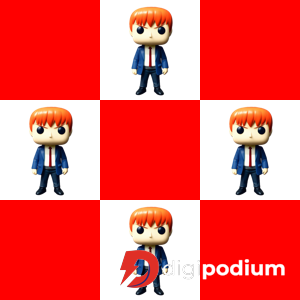

In [16]:
# paste image
im111 = im11.resize((100,100))
logo = Image.open(r"C:\Users\ZAID\Pictures\Rectangle_white_font.png")
logo = logo.resize((logo.width//6, logo.height//6))
rimg = Image.new("RGBA", (300, 300), "red")
rimg.paste(im111, (100, 200))
rimg.paste(im111, (100, 0))
rimg.paste(im111, (0, 100))
rimg.paste(im111, (200, 100))
rimg.paste(logo, (120,250), mask=logo)
rimg

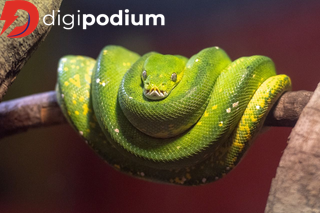

In [17]:
im222 = im22.copy()
im22.paste(logo, (0,0), mask=logo)
im22

In [18]:
# drawing on image
im3 = im2.copy()
font1 = ImageFont.truetype(r"c:\WINDOWS\Fonts\FLUBBER.TTF", 50)
font2 = ImageFont.truetype(r"c:\WINDOWS\Fonts\FLUBBER.TTF", 30)
draw = ImageDraw.Draw(im3)
msg = "Python for Artifical Intelligence"
msg2 = "By Zaid Kamil"
draw.text((50,50), msg, fill="white", font=font1)
draw.text((50,120), msg2, fill="white", font=font2)
im3.save("python_ai.png")